In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# Data Handling

In [19]:
# load the csv data file into a pandas dataframe and convert class into numerical data
df = pd.read_csv("data/star_classification.csv")
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

In [20]:
# display first few values of the data
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


## Dealing with duplicates & irrelevant observations

In [21]:
# remove duplicates and verify
df = df.drop_duplicates()
df[df.duplicated()]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [22]:
# check for null values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [23]:
# create a classifier to detect anomalies in the dataset
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

In [24]:
# create index to filter outlier based on a threshold
filter_outlier = outlier_score["score"] < -1.5
outlier_index = outlier_score[filter_outlier].index.tolist()
len(outlier_index)

15256

In [25]:
# drop outliers from dataframe
df.drop(outlier_index, inplace=True)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,2,0.586455,11069,58456,113


## Feature Selection

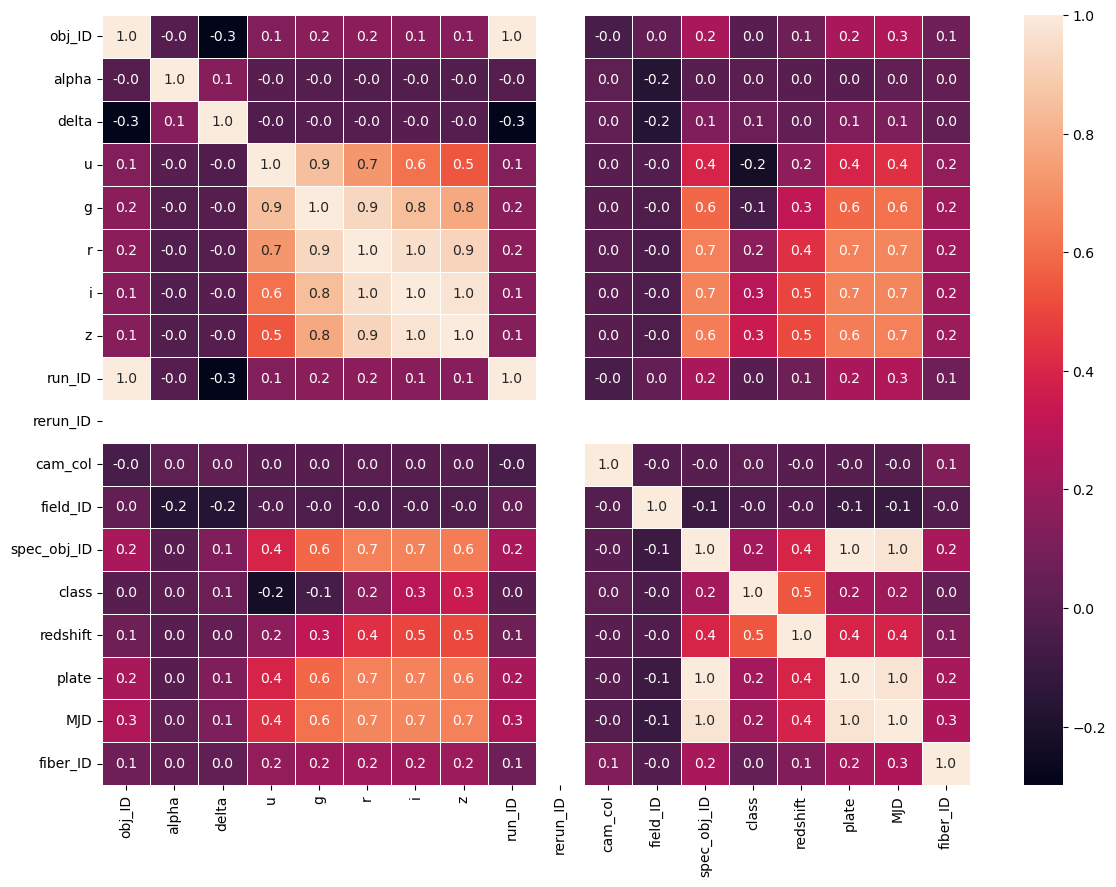

In [26]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot=True, fmt= ".1f", linewidths= .7)
plt.show()

In [27]:
# check correlation between values and the resulting class
correlation = df.corr()
correlation["class"].sort_values()

u             -0.222756
g             -0.058155
field_ID      -0.037529
run_ID         0.000245
obj_ID         0.000247
alpha          0.008183
cam_col        0.017749
fiber_ID       0.037349
delta          0.058952
r              0.160680
MJD            0.214441
spec_obj_ID    0.224728
plate          0.224729
i              0.294096
z              0.349730
redshift       0.541684
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [28]:
# therefore we can drop the columns that do not have a positive/negative (between -0.5 and 0.5) or a NaN correlation with the class column
df.drop(["field_ID", "run_ID", "obj_ID", "alpha", "cam_col", "fiber_ID", "delta", "rerun_ID"], axis=1, inplace=True)

In [29]:
df.head()

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187
6,21.46973,21.17624,20.92829,20.60826,20.42573,1.246262e+19,2,0.586455,11069,58456


## Train/Test data split